In [137]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [138]:
def time2freq(start_freq=0,refer_freq_x=False):
    global time_x, time_y
    global freq_x, freq_y

    if refer_freq_x: start_freq = freq_x[0]
    duration = (np.max(time_x) - np.min(time_x))*(len(time_x)+1)/len(time_x)
    arg_order = np.argsort(time_x)
    time_x_mem = np.linspace(0,duration*(len(time_x)-1)/len(time_x), len(time_x)) + np.min(time_x)
    time_y_mem = interp1d(time_x[arg_order], time_y[arg_order])(time_x_mem)
    time_y_mem = time_y_mem*np.exp(-2j*np.pi*time_x_mem*start_freq)

    start_time = np.min(time_x)

    freq_y = np.fft.fft(time_y_mem)
    freq_x = np.linspace(0,(len(time_x)-1)/duration, len(time_x)) + start_freq
    freq_y = freq_y*np.exp(-2j*np.pi*(freq_x + start_freq)*start_time)


def freq2time(start_time=0,refer_time_x=False):
    global time_x, time_y
    global freq_x, freq_y

    if refer_time_x: start_time = time_x[0]
    sampling_freq = (np.max(freq_x) - np.min(freq_x))*(len(freq_x)+1)/len(freq_x)
    arg_order = np.argsort(freq_x)
    freq_x_mem = np.linspace(0,sampling_freq*(len(freq_x)-1)/len(freq_x), len(freq_x)) + np.min(freq_x)
    freq_y_mem = interp1d(freq_x[arg_order], freq_y[arg_order])(freq_x_mem)
    freq_y_mem = freq_y_mem*np.exp(2j*np.pi*freq_x_mem*start_time)

    start_freq = np.min(freq_x)

    time_y = np.fft.ifft(freq_y_mem)
    time_x = np.linspace(0, (len(freq_x)-1)/sampling_freq,len(freq_x)) + start_time
    time_y = time_y*np.exp(2j*np.pi*(time_x-start_time)*start_freq)



8nm 1545.3nm パルスってどんな電場プロファイル?

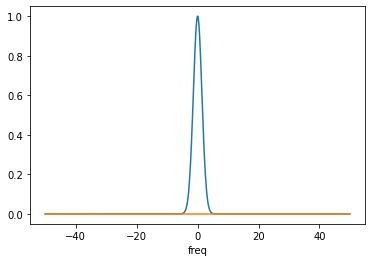

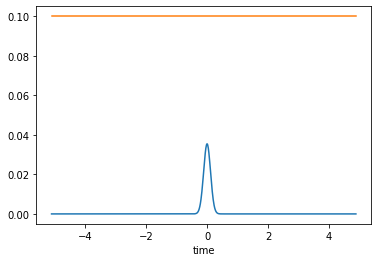

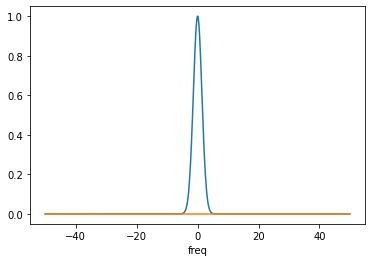

In [139]:

freq_x = np.linspace(-50,50,1000)[:-1]
freq_y = np.exp(-(freq_x/2)**2)

plt.plot(freq_x, freq_y.real)
plt.plot(freq_x, freq_y.imag)
plt.xlabel('freq')
plt.show()

freq2time(start_time=-5.1)

plt.plot(time_x, time_y.real)
plt.plot(time_x, time_y.imag+0.1)
plt.xlabel('time')
plt.show()

time2freq(start_freq=-50)

plt.plot(freq_x, freq_y.real)
plt.plot(freq_x, freq_y.imag)
plt.xlabel('freq')
plt.show()

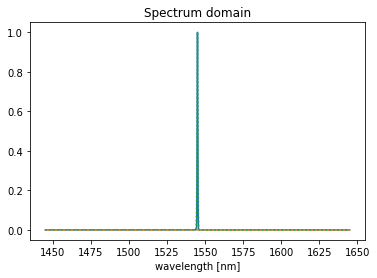

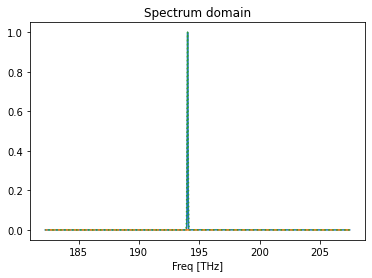

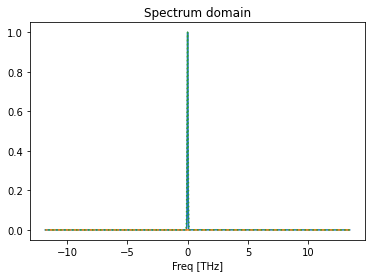

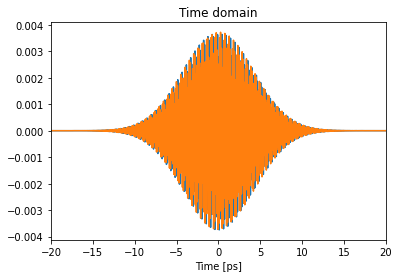

In [140]:
wavelength_range = np.linspace(1545-100,1545+100, 10000)
c = 299792458
freq_range = c/ (wavelength_range*1E-9)/1E12
bandwidth = 0.5
center_wavelength = 1545
center_freq = c/ (center_wavelength*1E-9)/1E12
power = np.exp(-((wavelength_range- center_wavelength)/(0.5*bandwidth))**2*np.log(2))
phase = 0*wavelength_range
electric_field = np.sqrt(power)

plt.plot(wavelength_range, power)
plt.plot(wavelength_range, phase,linestyle = "dashed",)
plt.plot(wavelength_range, electric_field, linestyle = "dotted")
plt.title('Spectrum domain')
plt.xlabel('wavelength [nm]')
plt.show()

plt.plot(freq_range, power)
plt.plot(freq_range, phase,linestyle = "dashed",)
plt.plot(freq_range, electric_field, linestyle = "dotted")
plt.title('Spectrum domain')
plt.xlabel('Freq [THz]')
plt.show()

shifted_freq_range = freq_range - center_freq

plt.plot(shifted_freq_range, power)
plt.plot(shifted_freq_range, phase,linestyle = "dashed",)
plt.plot(shifted_freq_range, electric_field, linestyle = "dotted")
plt.title('Spectrum domain')
plt.xlabel('Freq [THz]')
plt.show()

freq_x = shifted_freq_range.copy()
freq_y = electric_field.copy()

freq2time(start_time=-50)

time_y = time_y*np.exp(2j*np.pi*center_freq*time_x)
plt.plot(time_x, time_y.real)
plt.plot(time_x, time_y.imag)
plt.title('Time domain')
plt.xlabel('Time [ps]')
plt.xlim([-20,20])
plt.show()





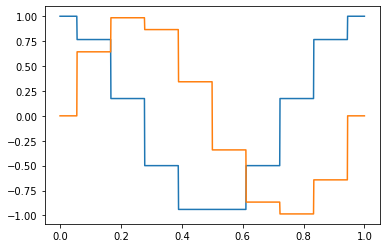

In [141]:
x = np.linspace(0,1,10)
y = np.exp(2j*np.pi*x)
some = interp1d(x, y,kind='nearest')
xx = np.linspace(0,1,1000)
plt.plot(xx,some(xx).real)
plt.plot(xx,some(xx).imag)